# CIS 520 Final Project

**DengAI**

**Pranav Panganamamula**

**Dinesh Jagai**

**Julian Schnitzler**

## Import Libraries

In [0]:
import pandas as pd
import matplotlib
import math
import matplotlib.pyplot as plt
import sklearn
import numpy as np
from collections import deque
import tensorflow as tf
from tensorflow import keras
from sklearn import linear_model
from sklearn import ensemble
from sklearn import kernel_ridge
import random
%matplotlib inline

In [7]:
# upload the processed filews where the missing data has been filled out through some method (In this case, MEAN IMPUTATION)
from google.colab import files
uploaded = files.upload()


Saving dengue_features_test_mean_imputed.csv to dengue_features_test_mean_imputed.csv
Saving dengue_features_train_mean_imputed.csv to dengue_features_train_mean_imputed.csv


In [8]:
#  upload the other files
from google.colab import files
uploaded = files.upload()

Saving dengue_labels_train.csv to dengue_labels_train.csv


## Import and Process Data

In [0]:
# Load in the data (N.b - the data can either be raw (with missing values), mean imputed, regression imputed)
X_train = pd.read_csv("dengue_features_train_mean_imputed.csv")
y_train = pd.read_csv("dengue_labels_train.csv")
X_test = pd.read_csv("dengue_features_test_mean_imputed.csv")

path_regression_train = "dengue_features_train_mean_imputed.csv" 
path_regression_test = "dengue_features_test_mean_imputed.csv"
X_train_regression_imputed = pd.read_csv(path_regression_train)
X_test_regression_imputed = pd.read_csv(path_regression_test)


# Seperate the data into their respective positions
X_data_train_sj = X_train[X_train['city'] == 'sj']
X_data_train_iq = X_train[X_train['city'] == 'iq']  
y_data_train_sj = y_train[y_train['city'] == 'sj']
y_data_train_iq = y_train[y_train['city'] == 'iq']
X_data_test_sj  = X_test[X_test['city'] == 'sj']
X_data_test_iq  = X_test[X_test['city'] == 'iq']

# Regressed data 
X_train_regression_imputed_sj = X_train_regression_imputed[X_train_regression_imputed['city'] == 'sj']
X_train_regression_imputed_iq = X_train_regression_imputed[X_train_regression_imputed['city'] == 'iq']
X_test_regression_imputed_sj = X_test_regression_imputed[X_test_regression_imputed['city'] == 'sj']
X_test_regression_imputed_iq = X_test_regression_imputed[X_test_regression_imputed['city'] == 'iq']



# drop the uncessary parts
y_data_train_sj = y_data_train_sj.drop(["city","year", "weekofyear"], axis=1)
y_data_train_iq = y_data_train_iq.drop(["city","year", "weekofyear"], axis=1)

# Training (Mean Imputed Values)
X_data_train_sj = X_data_train_sj.drop(["city","year", "week_start_date", "weekofyear"], axis=1)
X_data_train_iq = X_data_train_iq.drop(["city","year", "week_start_date", "weekofyear"], axis=1)

# Testing (Mean Imputed Values)
X_data_test_sj = X_data_test_sj.drop(["city","year", "week_start_date", "weekofyear"], axis=1)
X_data_test_iq = X_data_test_iq.drop(["city","year", "week_start_date", "weekofyear"], axis=1)

#  Training Regression Imputed Values 
X_train_regression_imputed_sj = X_train_regression_imputed_sj.drop(["city","year", "week_start_date", "weekofyear"], axis=1)
X_train_regression_imputed_iq = X_train_regression_imputed_iq.drop(["city","year", "week_start_date", "weekofyear"], axis=1)

# Testing (Regression Imputed Values)
X_test_regression_imputed_sj = X_test_regression_imputed_sj.drop(["city","year", "week_start_date", "weekofyear"], axis=1)
X_test_regression_imputed_iq = X_test_regression_imputed_iq.drop(["city","year", "week_start_date", "weekofyear"], axis=1)


# Visualize The Data

In [86]:
# Table containing all of the data 
# print(X_train.as_matrix)

#  view the data
# X_data_train_sj.style
# X_data_train_iq .style
# y_data_train_iq.style
# y_data_train_sj.style

# data_train.style
# data_train.head()
# data_train.describe()
# data_train.info()
# data_train.shape
# pd.plotting.scatter_matrix(data_train)

,ndvi_ne,ndvi_nw,ndvi_se,ndvi_sw,precipitation_amt_mm,reanalysis_air_temp_k,reanalysis_avg_temp_k,reanalysis_dew_point_temp_k,reanalysis_max_air_temp_k,reanalysis_min_air_temp_k,reanalysis_precip_amt_kg_per_m2,reanalysis_relative_humidity_percent,reanalysis_sat_precip_amt_mm,reanalysis_specific_humidity_g_per_kg,reanalysis_tdtr_k,station_avg_temp_c,station_diur_temp_rng_c,station_max_temp_c,station_min_temp_c,station_precip_mm
0,0.1226,0.103725,0.198483,0.177617,12.42,297.573,297.743,292.414,299.8,295.9,32,73.3657,12.42,14.0129,2.62857,25.4429,6.9,29.4,20,16
1,0.1699,0.142175,0.162357,0.155486,22.82,298.211,298.443,293.951,300.9,296.4,17.94,77.3686,22.82,15.3729,2.37143,26.7143,6.37143,31.7,22.2,8.6
2,0.03225,0.172967,0.1572,0.170843,34.54,298.781,298.879,295.434,300.5,297.3,26.1,82.0529,34.54,16.8486,2.3,26.7143,6.48571,32.2,22.8,41.4
3,0.128633,0.245067,0.227557,0.235886,15.36,298.987,299.229,295.31,301.4,297,13.9,80.3371,15.36,16.6729,2.42857,27.4714,6.77143,33.3,23.3,4
4,0.1962,0.2622,0.2512,0.24734,7.52,299.519,299.664,295.821,301.9,297.5,12.2,80.46,7.52,17.21,3.01429,28.9429,9.37143,35,23.9,5.8
5,0.649583,0.17485,0.254314,0.181743,9.58,299.63,299.764,295.851,302.4,298.1,26.49,79.8914,9.58,17.2129,2.1,28.1143,6.94286,34.4,23.9,39.1
6,0.1129,0.0928,0.205071,0.210271,3.48,299.207,299.221,295.866,301.3,297.7,38.6,82,3.48,17.2343,2.04286,27.4143,6.77143,32.2,23.3,29.7
7,0.0725,0.0725,0.151471,0.133029,151.12,299.591,299.529,296.531,300.6,298.4,30,83.3757,151.12,17.9771,1.57143,28.3714,7.68571,33.9,22.8,21.1
8,0.10245,0.146175,0.125571,0.1236,19.32,299.579,299.557,296.379,302.1,297.7,37.51,82.7686,19.32,17.79,1.88571,28.3286,7.38571,33.9,22.8,21.1
9,0.28785,0.12155,0.160683,0.202567,14.41,300.154,300.279,296.651,302.3,298.7,28.4,81.2814,14.41,18.0714,2.01429,28.3286,6.51429,33.9,24.4,1.1





# Convert dataframes to numpy arrays




In [112]:

# Convert all the data to numpy arrays to use in our functions
X_data_train_sj = X_data_train_sj.to_numpy()
X_data_train_iq = X_data_train_iq.to_numpy()
y_data_train_sj = y_data_train_sj.to_numpy()
y_data_train_iq = y_data_train_iq.to_numpy()
X_data_test_sj = X_data_test_sj.to_numpy()
X_data_test_iq = X_data_test_iq.to_numpy()

# Shape check
assert X_data_train_sj.shape[1] == X_data_train_iq.shape[1]
assert X_data_train_sj.shape[0] == y_data_train_sj.shape[0]
assert X_data_test_sj.shape[1] == X_data_test_iq.shape[1]
assert X_data_train_iq.shape[0] == y_data_train_iq.shape[0]


AttributeError: ignored

# OLS, Ridge, Elastic Net, Kernel Regression without cross validation


In [0]:
def LinearRegressionOLS(X,y, X_test):
    LinearRegression = linear_model.LinearRegression
    lin_reg = LinearRegression()
    lin_reg.fit(X,y)
    y_pred = lin_reg.predict(X_test)
    return y_pred

def RidgeRegression(X, y, alp, X_test):
    Ridge  = linear_model.Ridge
    ridge_reg =  Ridge(alpha = alp, solver = "cholesky")
    ridge_reg.fit(X,y)
    y_pred = ridge_reg.predict(X_test)
    return y_pred

def LassoRegression(X, y, alp, X_test):
    Lasso = linear_model.Lasso
    lasso_reg  = Lasso(alpha = alp)
    lasso_reg.fit(X, y)
    y_pred = lasso_reg.predict(X_test)
    return y_pred

def ElasticNetRegression(X, y, alp, ratio_l1, X_test):
    ElasticNet = linear_model.ElasticNet
    elastic_net = ElasticNet(alpha = alp, l1_ratio = ratio_l1) 
    elastic_net.fit(X, y)
    y_pred = elastic_net.predict(X_test)
    return y_pred


def KernelRegression(X, y, alp, X_test):
    KernelReg = sklearn.kernel_ridge.KernelRidge
    kernel_reg = KernelReg(alpha = alp)
    kernel_reg.fit(X,y)
    y_pred = kernel_reg.predict(X_test)
    return y_pred


def RandomForestRegression(X, y, num_estimators, X_test):
    RandomForestRegressor = ensemble.RandomForestRegressor
    random_forest_regressor = RandomForestRegressor(n_estimators= num_estimators, criterion = 'mae')
    random_forest_regressor.fit(X, y)
    y_pred = random_forest_regressor.predict(X_test)
    return y_pred

def GradientBoostingRegression(X,y , num_estimators, learning_r, maximum_depth, X_test):
    GradientBoostingRegressor = ensemble.GradientBoostingRegressor
    gradient_boosting_regressor = GradientBoostingRegressor(loss='ls', n_estimators= num_estimators, max_depth= maximum_depth, learning_rate = learning_r)
    gradient_boosting_regressor.fit(X, y)
    y_pred = gradient_boosting_regressor.predict(X_test)
    return y_pred

OLS, Ridge, Elastic Net, Kernel Regression **with** cross validation of hyperparameters 

In [0]:

# alps MUST be passed in as a array e.g. apls [0.1]
def RidgeRegressionCV(X, y,kfolds_num, alps, X_test):
    Ridge  = linear_model.RidgeCV
    ridge_reg =  Ridge(alphas = alps, cv = kfolds_num)
    ridge_reg.fit(X,y)
    y_pred = ridge_reg.predict(X_test)
    return y_pred

def LassoRegressionCV(X, y, kfolds_num, alps, X_test):
    Lasso = linear_model.LassoCV
    lasso_reg  = Lasso(alphas = alps, cv = kfolds_num)
    lasso_reg.fit(X, y)
    y_pred = lasso_reg.predict(X_test)
    return y_pred

def ElasticNetRegression(X, y, alps, l1_ratios_to_try, kfolds_num, X_test):
    # l1_ratios_to_try = [.1, .5, .7, .9, .95, .99, 1]
    ElasticNet = linear_model.ElasticNetCV
    elastic_net = ElasticNet(l1_ratio = l1_ratios_to_try, alphas = alps, cv = kfolds_num) 
    elastic_net.fit(X, y)
    y_pred = elastic_net.predict(X_test)
    return y_pred


def KernelRegressionCV(X, y, alps, X_test):
    KernelReg = sklearn.kernel_ridge.KernelRidge
    kernel_reg = KernelReg(alpha = alps)
    kernel_reg.fit(X,y)
    y_pred = kernel_reg.predict(X_test)
    return y_pred


[ 6  8  9 11]
[ 4.61259957  7.16871832  9.22519913 11.78131789]


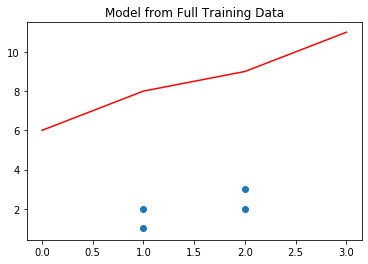

In [110]:
# X = np.array([[1, 1], [1, 2], [2, 2], [2, 3]])
# # y = 1 * x_0 + 2 * x_1 + 3
# y = np.dot(X, np.array([1, 2])) + 3
# print(y)
# print(KernelRegressionCV(X, y, [0.1, 0.2], X))
# plt.plot(y, color='red')
# plt.scatter(X[:,0], X[:,1])
# plt.title('Model from Full Training Data')
# plt.show()

# Main Code 



In [0]:

#Method 01 (Using Mean Imputed Values) 







# Method 02 (using Regression Imputed Values)





